 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

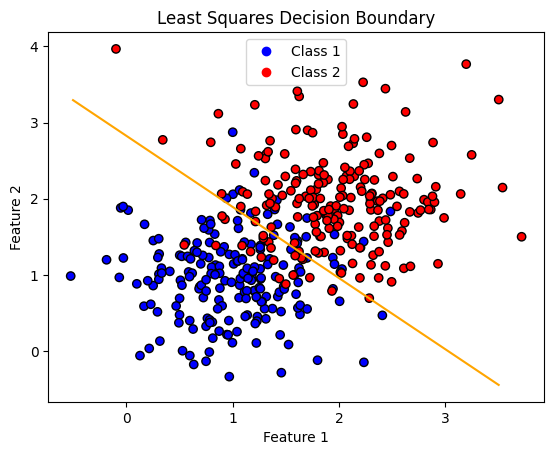

Accuracy of LS classifier 88.25 %
Accuracy of LS classifier with modified labels 88.25 %


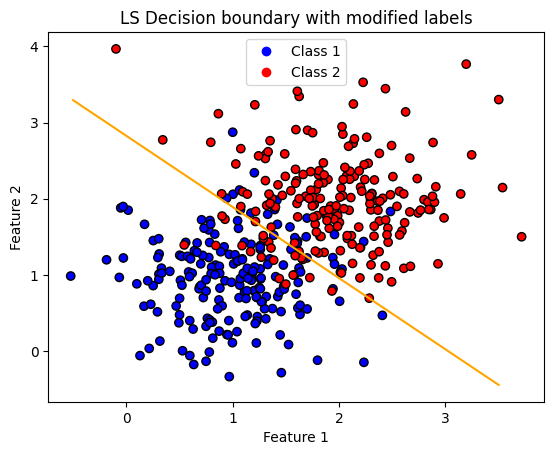

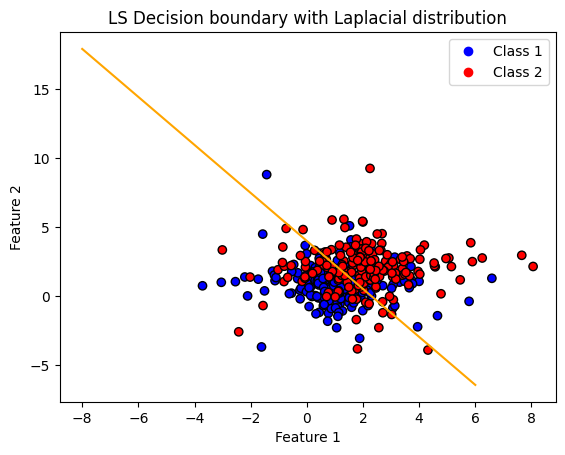

Accuracy of Laplacial classifier 71.25 %
Accuracy of LS classifier with modoified labels 71.25 %


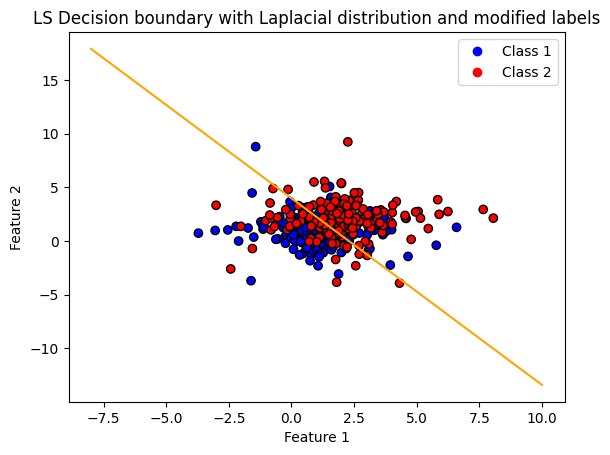

In [ ]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.concatenate([class1_tr, class2_tr])             #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0 if x in class1_tr else 1 for x in tr_data])       #Class labels. Assign the value "0" to class1 and the value "1" to class2.
# print(tr_data)

#Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)            #Class2 testing data
te_data = np.concatenate([class1_te, class2_te])              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0 if x in class1_te else 1 for x in te_data])           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    Y_train = Y_train.reshape((len(Y_train), 1))
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    pseudo_inverse = np.linalg.pinv(X_train.T @ X_train) @ X_train.T
    # print(Y_train.shape, pseudo_inverse.shape)
    weight = pseudo_inverse @ Y_train

    #Predict the lables of test data using the pseudo inverse solution
    pred_test_ls = X_test @ weight
    label_check = np.any(Y_train == 0)
    if label_check:
      pred_test = np.where(pred_test_ls < 0.5, 0, 1)
    else:
      pred_test = np.where(pred_test_ls < 0, -1, 1)

    #Return the predicted test labels
    return pred_test, weight

#Get the test data predictions
predictions, weight_ls = LS_Classify(tr_data, tr_targets, te_data)
# print((predictions-te_targets).tolist())

##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    acc = 0
    Y_pred = Y_pred.reshape(Y_test.shape)
    acc = np.mean((Y_test == Y_pred))

    #Return the accuracy
    return acc


##########################################
#Part-1)-d: Visualize the decision boundary
##########################################

plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-0.5, 3.5, 1000)
x2 = -(-0.5 +weight_ls[0] + weight_ls[1]*x1)/weight_ls[2]
plt.plot(x1, x2, color = 'orange')
plt.title('Least Squares Decision Boundary')

plt.show()

accuracy = LS_Classify_Accuracy(te_targets, predictions)
print('Accuracy of LS classifier', accuracy*100, '%')

##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################

tr_targets1 = 2*tr_targets - 1
te_targets1 = 2*te_targets - 1

predictions1, weight_ls1 = LS_Classify(tr_data, tr_targets1, te_data)
accuracy = LS_Classify_Accuracy(te_targets1, predictions1)
print('Accuracy of LS classifier with modified labels', accuracy*100, '%')

plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets1, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-0.5, 3.5, 1000)
x2 = -(weight_ls1[0] + weight_ls1[1]*x1)/weight_ls1[2]
plt.plot(x1, x2, color = 'orange')
plt.title('LS Decision boundary with modified labels')
plt.show()

##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################

scale = 1.0

class1_tr_lap = np.random.laplace(mean1, scale, (50, 2))
class2_tr_lap = np.random.laplace(mean2, scale, (50, 2))

tr_data_lap = np.concatenate([class1_tr_lap, class2_tr_lap])
tr_targets_lap = np.array([0 if x in class1_tr_lap else 1 for x in tr_data_lap])

class1_te_lap = np.random.laplace(mean1, scale, (200, 2))
class2_te_lap = np.random.laplace(mean2, scale, (200, 2))

te_data_lap = np.concatenate([class1_te_lap, class2_te_lap])
te_targets_lap = np.array([0 if x in class1_te_lap else 1 for x in te_data_lap])

pred, weight_lap = LS_Classify(tr_data_lap, tr_targets_lap, te_data_lap)

plt.scatter(te_data_lap[:, 0], te_data_lap[:, 1], c=te_targets_lap, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-8, 6, 1000)
x2 = -(-0.5 + weight_lap[0] + weight_lap[1]*x1)/weight_lap[2]
plt.plot(x1, x2, color = 'orange')
plt.title('LS Decision boundary with Laplacial distribution')
plt.show()

accuracy = LS_Classify_Accuracy(te_targets_lap, pred)
print('Accuracy of Laplacial classifier', accuracy*100, '%')


tr_targets_lap1 = 2*tr_targets_lap - 1
te_targets_lap1 = 2*te_targets_lap - 1

predictions1, weight_lap1 = LS_Classify(tr_data_lap, tr_targets_lap1, te_data_lap)
accuracy = LS_Classify_Accuracy(te_targets_lap1, predictions1)
print('Accuracy of LS classifier with modoified labels', accuracy*100, '%')

plt.scatter(te_data_lap[:, 0], te_data_lap[:, 1], c=te_targets_lap1, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-8, 10, 1000)
x2 = -(weight_lap1[0] + weight_lap1[1]*x1)/weight_lap1[2]
plt.plot(x1, x2, color = 'orange')
plt.title('LS Decision boundary with Laplacial distribution and modified labels')
plt.show()





<b> Report your observations </b>


1. Since the model's success is based on its capacity to accurately classify examples rather than the precise labels given to each class, the choice of labels for the classes has no bearing on the model's accuracy.

2. The underlying data distribution may have an impact on the accuracy of the model. The model may occasionally achieve marginally better accuracy when the data has a Laplacian distribution than when it has a Gaussian distribution. This is not a hard-and-fast rule, though, as there are a number of other variables that might affect accuracy, including the model's complexity and the caliber of the data.



<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


In [ ]:
def FDA_project_K(X_train, Y_train, X_test, k):
    # Inputs: Training data, Training labels, Testing data, and the number of eigenvalues to be considered
    # Output: Projection matrix

    # Compute and return the projection matrix
    labels = np.unique(Y_train)  # Get unique class labels
    D = X_train.shape[1]  # Dimensionality of the data
    m = np.zeros((len(labels), D))  # Array to store class means

    # Compute class means
    for i, label in enumerate(labels):
        class_indices = np.where(Y_train == label)[0]
        m[i] = np.mean(X_train[class_indices], axis=0)

    Sw = np.zeros((D, D))  # Within-class scatter matrix
    for i, label in enumerate(labels):
        class_indices = np.where(Y_train == label)[0]
        for x in X_train[class_indices]:
            x = x.reshape(-1, 1)
            Sw += np.dot((x - m[i]), (x - m[i]).T)

    # Compute eigenvalues and eigenvectors of Sw
    eigvals, eigvecs = np.linalg.eigh(Sw)

    # Select the top k eigenvectors corresponding to the largest eigenvalues
    top_k_eigvecs = eigvecs[:, -k:]

    # Return the projection matrix
    return top_k_eigvecs

# Example usage:
k = 2  # Number of eigenvalues to consider
projection_matrix = FDA_project_K(tr_data, tr_targets, te_data, k)
print("Projection matrix shape:", projection_matrix.shape)


Projection matrix shape: (2, 2)


Accuracy with LDA: 89.25 %
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 

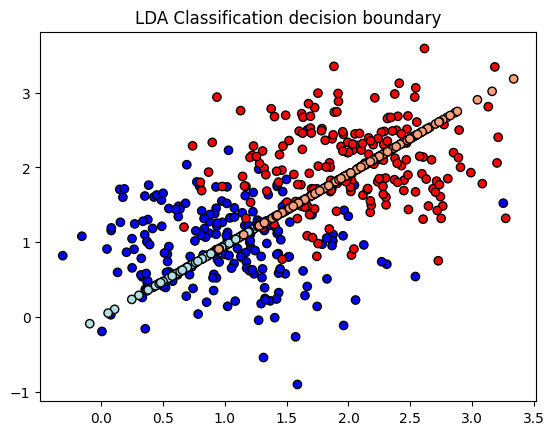

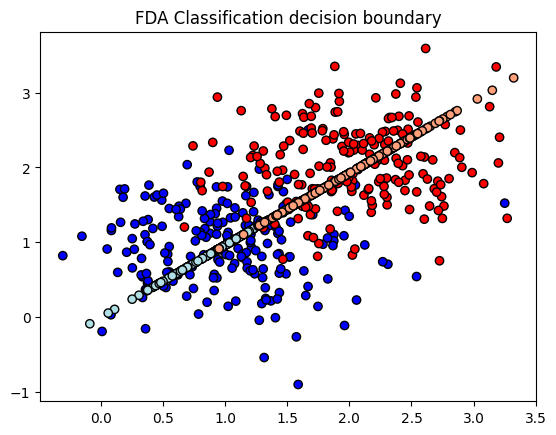

In [ ]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.concatenate([class1_tr, class2_tr])             #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0 if x in class1_tr else 1 for x in tr_data])       #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)            #Class2 testing data
te_data = np.concatenate([class1_te, class2_te])              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0 if x in class1_te else 1 for x in te_data])           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
  m1 = np.mean(X_train[:50], axis = 0)
  m2 = np.mean(X_train[50:], axis = 0)

  w = (m2-m1)/np.linalg.norm(m2-m1)

  #Compute the threshold
  mu1 = np.dot(w, m1)
  mu2 = np.dot(w, m2)
  threshold = (mu1+mu2)/2

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  proj_data = np.dot(X_test, w)
  predictions = np.where(proj_data >= threshold, 1, 0)

  #Return weight vector and the predictions on testing data
  return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)
# print(predictions)

def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = np.dot(X_test, w)
  proj_vec = w*projections[:, np.newaxis]

  #Plot the projections
  plt.figure()
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
  plt.scatter(proj_vec[:, 0], proj_vec[:, 1], c=Y_test, cmap=ListedColormap(['#B0E0E6', '#FFA07A']), edgecolors='k')
  plt.title('LDA Classification decision boundary')
  plt.plot()

LDA_project(w, te_data, te_targets)

#Compute and print the accuracy
acc = np.mean(te_targets == predictions)
print('Accuracy with LDA:', acc*100, '%')


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  #Compute the weight vector
  m = [[], []]
  m[0] = np.mean(X_train[:50], axis = 0)
  m[1] = np.mean(X_train[50:], axis = 0)

  Sw = np.zeros((2, 2))
  m[0] = m[0].reshape((2,1))
  m[1] = m[1].reshape((2,1))
  # print(X_train[0].shape)
  for k in range(2):
    for n in range(k*50, (k+1)*50):
      x_n = X_train[n].reshape((2,1))
      # print('shape = ', (x_n-m[k]).T.shape)
      Sw += np.dot((x_n-m[k]), (x_n-m[k]).T)

  # print((np.linalg.inv(Sw)).shape)
  w = np.linalg.inv(Sw) @ (m[1] - m[0])
  w /= np.linalg.norm(w)

  #Compute the threshold
  mu1 = np.dot(w.T, m[0])
  mu2 = np.dot(w.T, m[1])
  threshold = (mu1+mu2)/2
  # print(X_test.shape)

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  proj_data = np.dot(X_test, w)
  # print(X_test.shape, w.shape, threshold.shape)
  predictions = np.where(proj_data >= threshold, 1, 0)

  #Return weight vector and the predictions on testing data
  return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)


def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = np.dot(X_test, w)
  proj_vec = w * projections[:, np.newaxis]

  #Plot the projections
  plt.figure()
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
  plt.scatter(proj_vec[:, 0], proj_vec[:, 1], c=Y_test, cmap=ListedColormap(['#B0E0E6', '#FFA07A']), edgecolors='k')
  plt.title('FDA Classification decision boundary')
  plt.plot()

FDA_project(w, te_data, te_targets)
#Compute and print the accuracy
predictions = predictions.reshape(te_targets.shape)
print(te_targets, predictions)
print('Accuracy with FDA:', acc*100, '%')

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix


  #Compute and return the projection matrix
  label = [i for i in k]
  D = X_train.shape[1]
  D1 = k-1
  mt = np.mean(X_train)
  m = np.zeros((k, D))
  for i in range(k):
    m[i] = np.mean(X_train[np.where(Y_train == label[i])[0]])

  Sw = np.zeros((D, D))
  for i in range(k):
    # for n in range(len(X_train)):           ## Uncomment this block if required
    #   X_train[n] = X_train[n].reshape((D,1))
    Sw += np.sum((X_train[np.where(Y_train == label[i])[0]]-m[i]) @ (X_train[np.where(Y_train == label[i])[0]]-m[i]).T)

  Sb = np.array(D, D)
  for i in range(k):
    Ni = np.count_nonzero(Y_train == label[i])
    Sb += Ni * (m[i] - mt) @ (m[i] - mt).T

  eigenvectors, eigenvalues = np.linalg.eig(Sw @ np.linalg.inv(Sb))
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_indices]
  sorted_eigenvectors = eigenvectors[:, sorted_indices]

  p_largest_eigenvalues = sorted_eigenvalues[:D1]
  p_largest_eigenvectors = sorted_eigenvectors[:, :D1]

  w = p_largest_eigenvectors
  return w





<b> Report your observations </b>

1. The accuracy attained with Fisher's Discriminant Analysis (FDA) for the provided dataset is marginally higher(almost equal in this case). This is because the weight vector is not considerably affected by the multiplication with the inverse of the within-class scatter matrix $(Sw^-1)$ due to the way the data is constructed. It's crucial to note, though, that using FDA can significantly increase accuracy for other datasets.


<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


accuracy of perceptron claassification =  0.775


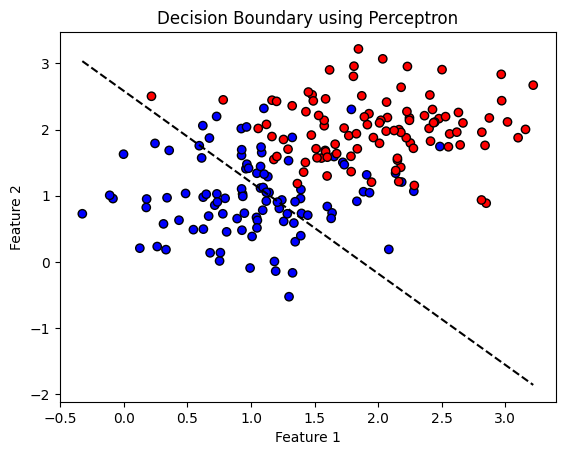

accuracy of LS claassification =  0.895


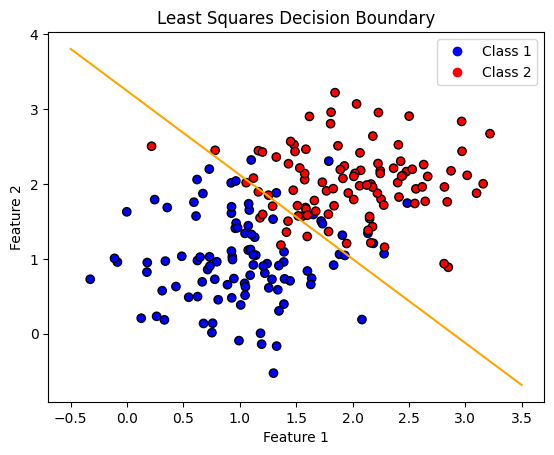

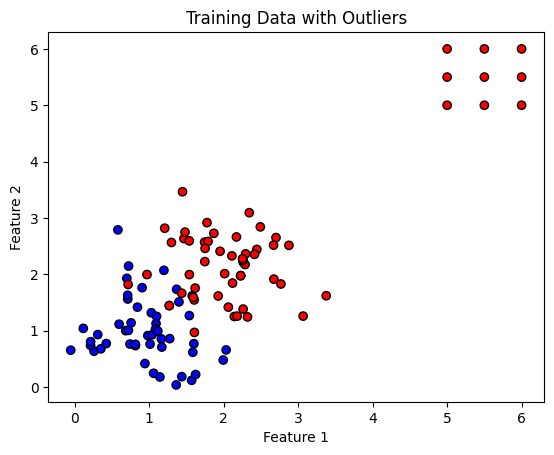

accuracy of perceptron claassification in presence of outliers =  0.77


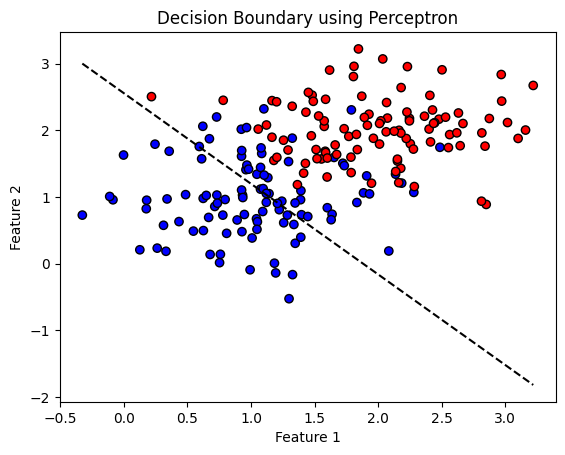

accuracy of LS claassification in presence of outliers =  0.77


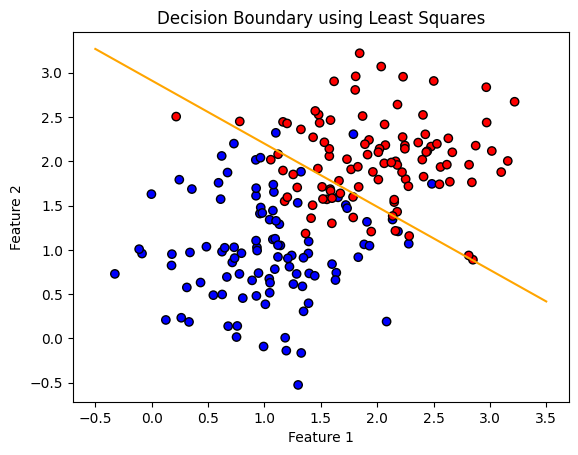

accuracy of perceptron claassification in case of XOR =  0.4791666666666667


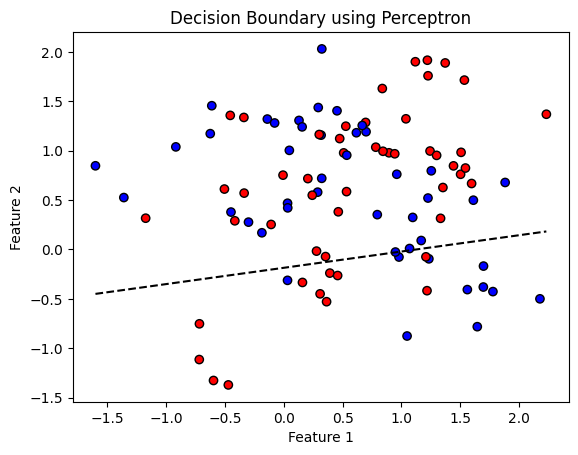

In [ ]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.concatenate((class1_tr,class2_tr))              #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([-1]*50 + [1]*50)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 100)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 100)            #Class2 testing data
te_data = np.concatenate((class1_te,class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([-1]*100 + [1]*100)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.



########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000   #Number of epochs
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))         #Data. Append ones to the training data to take care of the bias
    w = np.random.randn(X.shape[1])         #Initialize the weight vector
    for epoch in range(0,epochs,1):
      for i, x in enumerate(X):
        #Compute the predictions
        prediction = np.sign(np.dot(w, x))

        #Compute the error
        error = Y_train[i] - prediction

        #Update the weight vector
        w += error * x

    #Compute the test data predicitions using the final weight vector
    X_te = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(np.dot(X_te, w))


    #Return the test data predictions and the final weight vector
    return predictions, w


##########################################
#Plot the decision boundary using perceptron
##########################################
def plot_decision_boundary(X, Y, w):
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')

    x_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_boundary = -(w[0] + w[1] * x_boundary) / w[2]
    plt.plot(x_boundary, y_boundary, 'k--')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary using Perceptron')
    plt.show()

# print(te_data[:, 0].shape, te_targets.shape)
predictions, w = Perceptron(tr_data, tr_targets, te_data)
pred = predictions.reshape(te_targets.shape)
print('accuracy of perceptron claassification = ', np.mean(pred == te_targets))
plot_decision_boundary(te_data, te_targets, w)


##########################################
#Plot the decision boundary using least squares
##########################################
predictions, weight_ls = LS_Classify(tr_data, tr_targets, te_data)
pred = predictions.reshape(te_targets.shape)
print('accuracy of LS claassification = ', np.mean(pred == te_targets))
# plot_decision_boundary(te_data, te_targets, weight_ls)

plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-0.5, 3.5, 1000)
x2 = -(weight_ls[0] + weight_ls[1]*x1)/weight_ls[2]
plt.plot(x1, x2, color = 'orange')
plt.title('Least Squares Decision Boundary')

plt.show()


##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

outliers = np.array([[5, 5], [5, 6], [6, 5], [6, 6], [5.5, 5.5], [5, 5.5], [5.5, 5], [6, 5.5], [5.5, 6]])  # Define outlier points
tr_data_outliers = np.vstack((tr_data, outliers))
tr_targets_outliers = np.hstack((tr_targets, np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])))  # Assuming outliers belong to class 1

plt.scatter(tr_data_outliers[:, 0], tr_data_outliers[:, 1], c=tr_targets_outliers, cmap = ListedColormap(['blue', 'red']), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Outliers')
plt.show()

predictions_perceptron, w_perceptron = Perceptron(tr_data_outliers, tr_targets_outliers, te_data)
pred = predictions_perceptron.reshape(te_targets.shape)
print('accuracy of perceptron claassification in presence of outliers = ', np.mean(pred == te_targets))

plot_decision_boundary(te_data, te_targets, w_perceptron)

predictions_ls, weight_ls = LS_Classify(tr_data_outliers, tr_targets_outliers, te_data)
pred = predictions_perceptron.reshape(te_targets.shape)
print('accuracy of LS claassification in presence of outliers = ', np.mean(pred == te_targets))

plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
plt.plot(x1, -(weight_ls[0] + weight_ls[1]*x1)/weight_ls[2], color='orange')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary using Least Squares')
plt.show()


##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0, 0]     #Mean of Gaussian1
class1_mean2 = [1, 1]     #Mean of Gaussian3
class2_mean1 = [1, 0]     #Mean of Gaussian2
class2_mean2 = [0, 1]     #Mean of Gaussian4
cov = [[0.3,0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 = np.random.multivariate_normal(class1_mean1,cov,60)
class1_data2 = np.random.multivariate_normal(class1_mean2,cov,60)
class2_data1 = np.random.multivariate_normal(class2_mean1,cov,60)
class2_data2 = np.random.multivariate_normal(class2_mean2,cov,60)

#Obtain 2-class dataset
X_class1 = np.vstack((class1_data1, class1_data2))
y_class1 = np.ones(120)

X_class2 = np.vstack((class2_data1, class2_data2))
y_class2 = -1 * np.ones(120)

X = np.vstack((X_class1, X_class2))
y = np.hstack((y_class1, y_class2))

#Create train test splits
random_indices = np.random.permutation(240)
X_shuffled = X[random_indices]
y_shuffled = y[random_indices]

train_size = int(0.6 * 240)  # 60% of the data for training
X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]


#Classify this dataset using perceptron algorithm
predictions_perc, w_perc = Perceptron(X_train, y_train, X_test)
pred = predictions_perc.reshape(y_test.shape)
print('accuracy of perceptron claassification in case of XOR = ', np.mean(pred == y_test))

#Plot the decision boundary
plot_decision_boundary(X_test, y_test, w_perc)





<b> Report your observations </b>

1. Data outliers have an impact on the Least Squares method's decision boundary. This is so because extreme values or outliers can have a considerable impact on the Least Squares approach, which minimizes the sum of the squared differences between the observed and projected values. However, if the data can be separated linearly, the Perceptron technique is more resistant to outliers. This is because only when a misclassified point is encountered does the Perceptron algorithm update the weight vector. Consequently, an outlier won't have an impact on the Perceptron algorithm's decision boundary if it doesn't lead to misclassification.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




(2, 2)


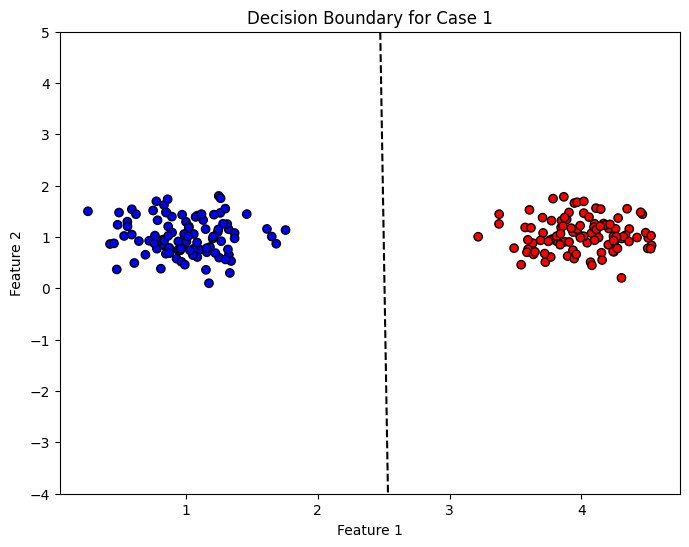

(2, 2)


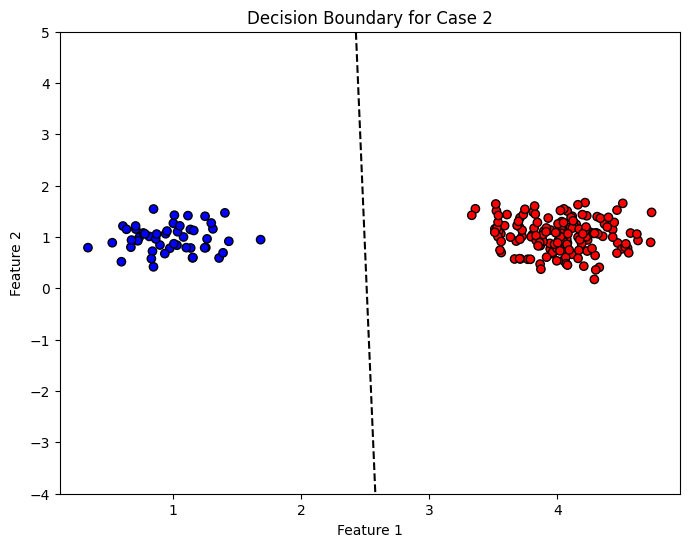

(2, 2)


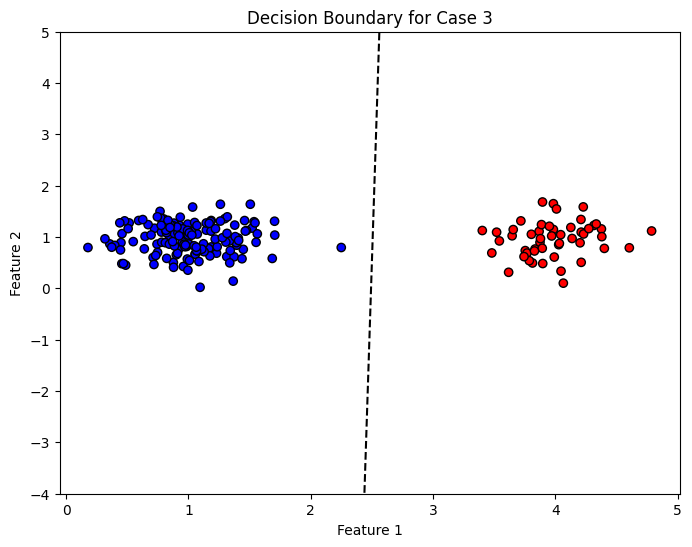

In [ ]:
##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [4, 1]
cov = [[0.1, 0], [0, 0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr_data1 = np.random.multivariate_normal(m1,cov,100)
class2_tr_data1 = np.random.multivariate_normal(m2,cov,100)
tr_data1 = np.concatenate((class1_tr_data1, class2_tr_data1))
tr_targets1 = np.array([1]*100 + [2]*100)

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr_data2 = np.random.multivariate_normal(m1,cov,50)
class2_tr_data2 = np.random.multivariate_normal(m2,cov,150)
tr_data2 = np.concatenate((class1_tr_data2, class2_tr_data2))
tr_targets2 = np.array([1]*50 + [2]*150)

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr_data3 = np.random.multivariate_normal(m1,cov,150)
class2_tr_data3 = np.random.multivariate_normal(m2,cov,50)
tr_data3 = np.concatenate((class1_tr_data3, class2_tr_data3))
tr_targets3 = np.array([1]*150 + [2]*50)


##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    c1_indices = np.where(Y_train == 1)[0]
    p_c1 = (len(c1_indices))/len(X_train)
    p_c2 = 1. - p_c1
    # print(X_train[np.where(Y_train == 1)[0]])

    mean_1 = np.mean(X_train[np.where(Y_train == 1)[0]], axis = 0).reshape((2,))
    mean_2 = np.mean(X_train[np.where(Y_train == 2)[0]], axis = 0).reshape((2,))
    # print('shape: ', (X_train[np.where(Y_train == 1)[0]] - mean1).shape)

    cov1 = np.zeros((2, 2))
    for x in X_train[np.where(Y_train == 1)[0]]:
        x_diff = (x - mean_1).reshape(-1, 1)
        cov1 += np.dot(x_diff, x_diff.T)
    cov1 /= len(c1_indices)

    cov2 = np.zeros((2, 2))
    for x in X_train[np.where(Y_train == 2)[0]]:
        x_diff = (x - mean_2).reshape(-1, 1)
        cov2 += np.dot(x_diff, x_diff.T)
    cov2 /= (len(X_train) - len(c1_indices))

    cov = (len(c1_indices)*cov1 + (len(X_train)-len(c1_indices))*cov2)/len(X_train)
    print(cov1.shape)

    w = np.dot(np.linalg.inv(cov), (mean_1 - mean_2))
    w0 = -0.5 * mean_1.T @ np.linalg.inv(cov) @ mean_1 + 0.5 * mean_2.T @ np.linalg.inv(cov) @ mean_2 + np.log(p_c1/p_c2)

    return np.array([w0]+list(w))

#Plot the decision regions
def plot_decision_regions(X_train, Y_train, case):
    w = decisionBoundary(X_train, Y_train)
    slope = -w[1] / w[2]
    intercept = -w[0] / w[2]

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
    plt.plot([2, 3], [intercept, intercept + 5 * slope], 'k--')
    plt.ylim(-4, 5)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for Case {}'.format(case))
    plt.show()

plot_decision_regions(tr_data1, tr_targets1, 1)
plot_decision_regions(tr_data2, tr_targets2, 2)
plot_decision_regions(tr_data3, tr_targets3, 3)



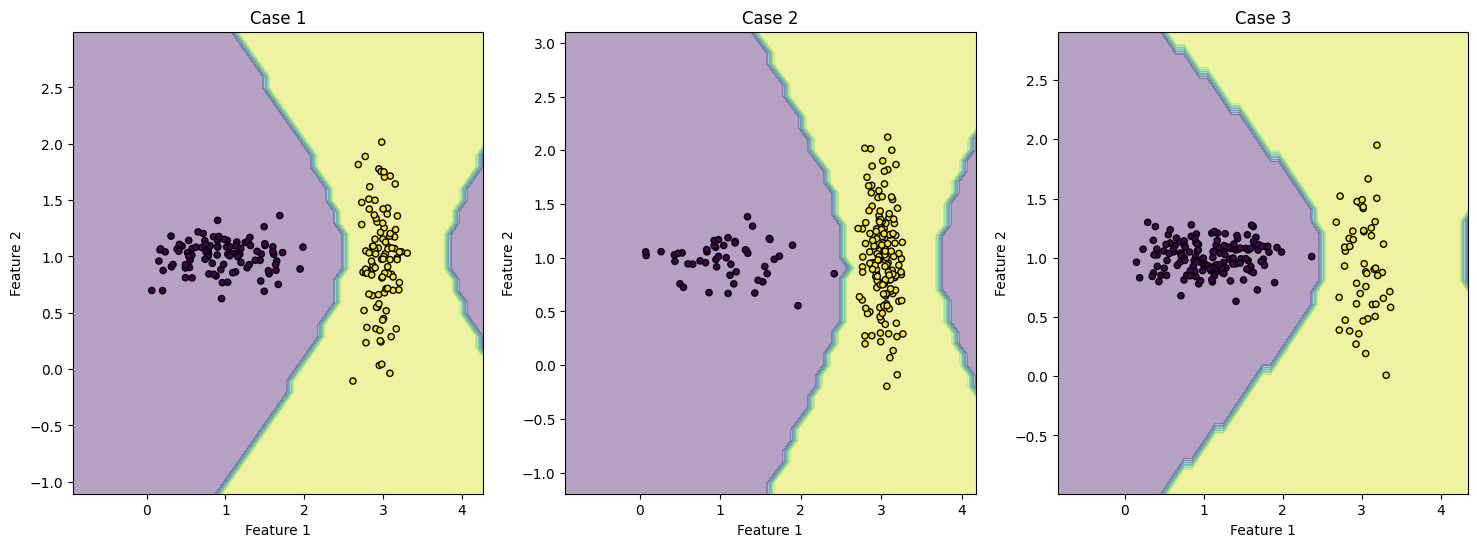

In [ ]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = np.array([1, 1])
m2 = np.array([3, 1])
cov1 = np.array([[0.2, 0.0], [0.0, 0.02]])
cov2 = np.array([[0.02, 0.0], [0.0, 0.2]])

#Case1: Generate 100 samples from each class.
class1_tr_data1 = np.random.multivariate_normal(m1, cov1, 100)
class2_tr_data1 = np.random.multivariate_normal(m2, cov2, 100)
tr_data1 = np.concatenate((class1_tr_data1, class2_tr_data1))
tr_targets1 = np.array([1] * 100 + [2] * 100)

#Case2: Generate 50 samples from class1 and 150 samples from class2.
class1_tr_data2 = np.random.multivariate_normal(m1, cov1, 50)
class2_tr_data2 = np.random.multivariate_normal(m2, cov2, 150)
tr_data2 = np.concatenate((class1_tr_data2, class2_tr_data2))
tr_targets2 = np.array([1] * 50 + [2] * 150)

#Case3: Generate 150 samples from class1 and 50 samples from class2.
class1_tr_data3 = np.random.multivariate_normal(m1, cov1, 150)
class2_tr_data3 = np.random.multivariate_normal(m2, cov2, 50)
tr_data3 = np.concatenate((class1_tr_data3, class2_tr_data3))
tr_targets3 = np.array([1] * 150 + [2] * 50)


##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
def multivariate_normal_pdf(x, mean, cov):
    k = len(mean)
    coeff = 1 / ((2 * np.pi) ** (k / 2) * np.linalg.det(cov) ** 0.5)
    diff = x - mean.reshape(1, -1)
    exponent = -0.5 * np.sum(np.dot(diff, np.linalg.inv(cov)) * diff, axis=1)
    pdf = coeff * np.exp(exponent)
    return pdf


#Complete the below function
def decisionBoundary(X_train, Y_train, X_test):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = len(np.where(Y_train == 1)[0]) / len(Y_train)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[np.where(Y_train == 1)[0]], axis=0)
    mean_2 = np.mean(X_train[np.where(Y_train == 2)[0]], axis=0)

    cov1 = np.cov(X_train[np.where(Y_train == 1)[0]].T)
    cov2 = np.cov(X_train[np.where(Y_train == 2)[0]].T)

    #Compute predictions on test data
    pred1 = multivariate_normal_pdf(X_test, mean=mean_1, cov=cov1) * p_c1
    pred2 = multivariate_normal_pdf(X_test, mean=mean_2, cov=cov2) * p_c2
    predictions = np.where(pred1 > pred2, 1, 2)
    return predictions

#Plot the decision regions
def plot_decision_regions(X_train, Y_train, case):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = decisionBoundary(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, case)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k')
    plt.title('Case {}'.format(case))
    # plt.xlim(-1, 3.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(18, 6))
plot_decision_regions(tr_data1, tr_targets1, 1)
plot_decision_regions(tr_data2, tr_targets2, 2)
plot_decision_regions(tr_data3, tr_targets3, 3)
plt.show()





<b> Report your observations </b>

1. The decision boundary stays linear when covariance is shared by classes. This boundary can be moved, but not its orientation, by varying the prior probabilities of each class.

2. On the other hand, the decision boundary turns non-linear in terms of the vector x, when covariance is not shared. In this case, altering the prior probability has an impact on the decision boundary's intercept, but not its orientation.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations


(100, 3)


 Accuracy with Logistic Regression: 0.8775 


(100, 3)


<ipython-input-12-a0b04cfe27a9>:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=label, edgecolor='black')


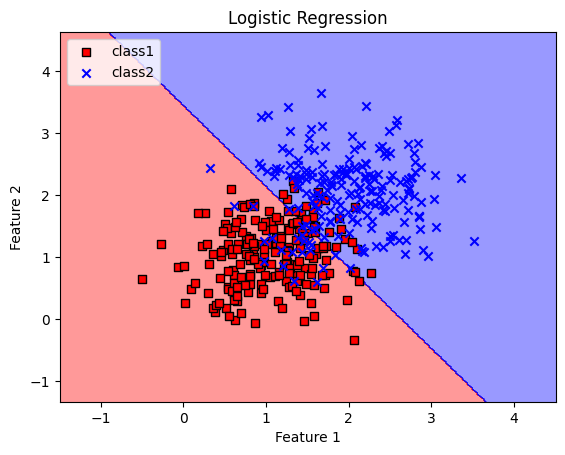

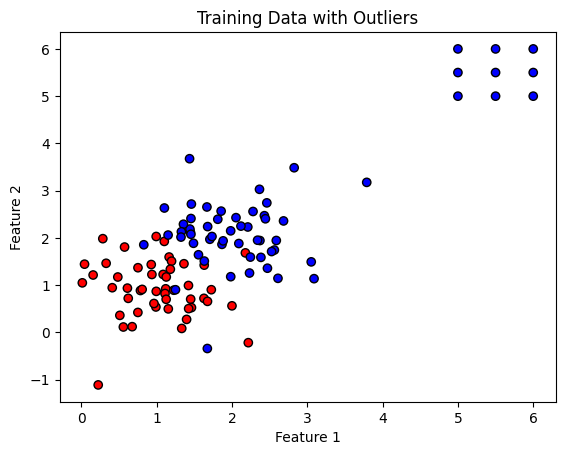

(100, 3)


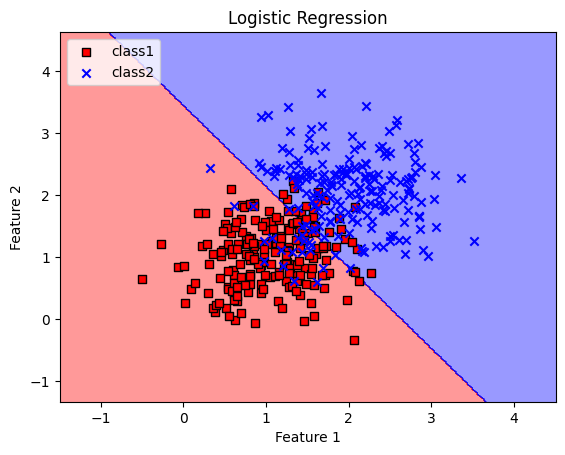

(109, 3)


 Accuracy with Logistic Regression: 0.8775 




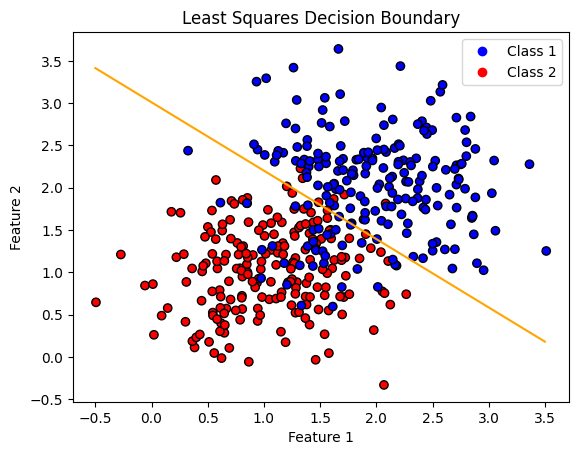

Accuracy of LS classifier 89.25 %


In [ ]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = np.array([1, 1])           #Mean of class1
mean2 = np.array([2, 2])           #Mean of class2
cov = np.array([[0.3, 0.0], [0.0, 0.3]]) #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))              #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0] * 50 + [1] * 50)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)            #Class2 testing data
te_data = np.concatenate((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0] * 200 + [1] * 200)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  def sigmoid(z):
    return 1 / (1 + np.exp(-z))

  max_iter = 1000 #max number of ierations for parameter update
  threshold = 0.5 #threshold for classification
  X = np.c_[np.ones((X_train.shape[0], 1)), X_train]         #Data. Append ones to the training data to take care of the bias
  print(X.shape)
  w = np.random.rand(X.shape[1])         #Initialize the weight vector
  for iter in range(0,max_iter,1):
    preds = sigmoid(np.dot(X, w))   #Predictions on X. Sigmoid(w^T.x)
    error = preds - Y_train   #Difference between preds and Y_train
    # print(preds == error)

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    gradient = np.dot(X.T, error)
    hessian = np.dot(X.T * preds * (1 - preds), X)

    #Update the weight vector
    w -= np.dot(np.linalg.pinv(hessian), gradient)

  #Test data predictions
  X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias to test data
  test_preds = sigmoid(np.dot(X_test, w))

  #Compare the predictions with 0, to output the decision
  test_preds[test_preds >= threshold] = 1
  test_preds[test_preds < threshold] = 0

  #Return the predicted test labels
  return test_preds

Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy

  #Compute and return the accuracy
  Y_test = Y_test.reshape(Y_pred.shape)
  correct = np.sum(Y_test == Y_pred)
  total = len(Y_pred)
  accuracy = correct / total

  return accuracy


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        label = 'class1' if cl == 0 else 'class2'
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=label, edgecolor='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression')
    plt.legend(loc='upper left')

def classifier_log(X):
    return Logistic_Regression(tr_data, tr_targets, X)

plot_decision_regions(te_data, te_targets, classifier=classifier_log)
plt.show()

##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################
outliers = np.array([[5, 5], [5, 6], [6, 5], [6, 6], [5.5, 5.5], [5, 5.5], [5.5, 5], [6, 5.5], [5.5, 6]])
tr_data_outliers = np.vstack((tr_data, outliers))
tr_targets_outliers = np.hstack((tr_targets, np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])))

plt.scatter(tr_data_outliers[:, 0], tr_data_outliers[:, 1], c=tr_targets_outliers, cmap = ListedColormap(['red', 'blue']), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Outliers')
plt.show()

plot_decision_regions(te_data, te_targets, classifier=classifier_log)
plt.show()

Y_pred_new = Logistic_Regression(tr_data_outliers, tr_targets_outliers, te_data)
acc = LR_Accuracy(te_targets, Y_pred_new)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

Y_pred, weight_ls = LS_Classify(tr_data_outliers, tr_targets_outliers, te_data)

plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
handles = [plt.Line2D([], [], marker='o', color='blue', linestyle='None'),
           plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Class 1', 'Class 2']
plt.legend(handles, labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x1 = np.linspace(-0.5, 3.5, 1000)
x2 = -(-0.5 +weight_ls[0] + weight_ls[1]*x1)/weight_ls[2]
plt.plot(x1, x2, color = 'orange')
plt.title('Least Squares Decision Boundary')

plt.show()

accuracy = LS_Classify_Accuracy(te_targets, Y_pred)
print('Accuracy of LS classifier', accuracy*100, '%')


<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


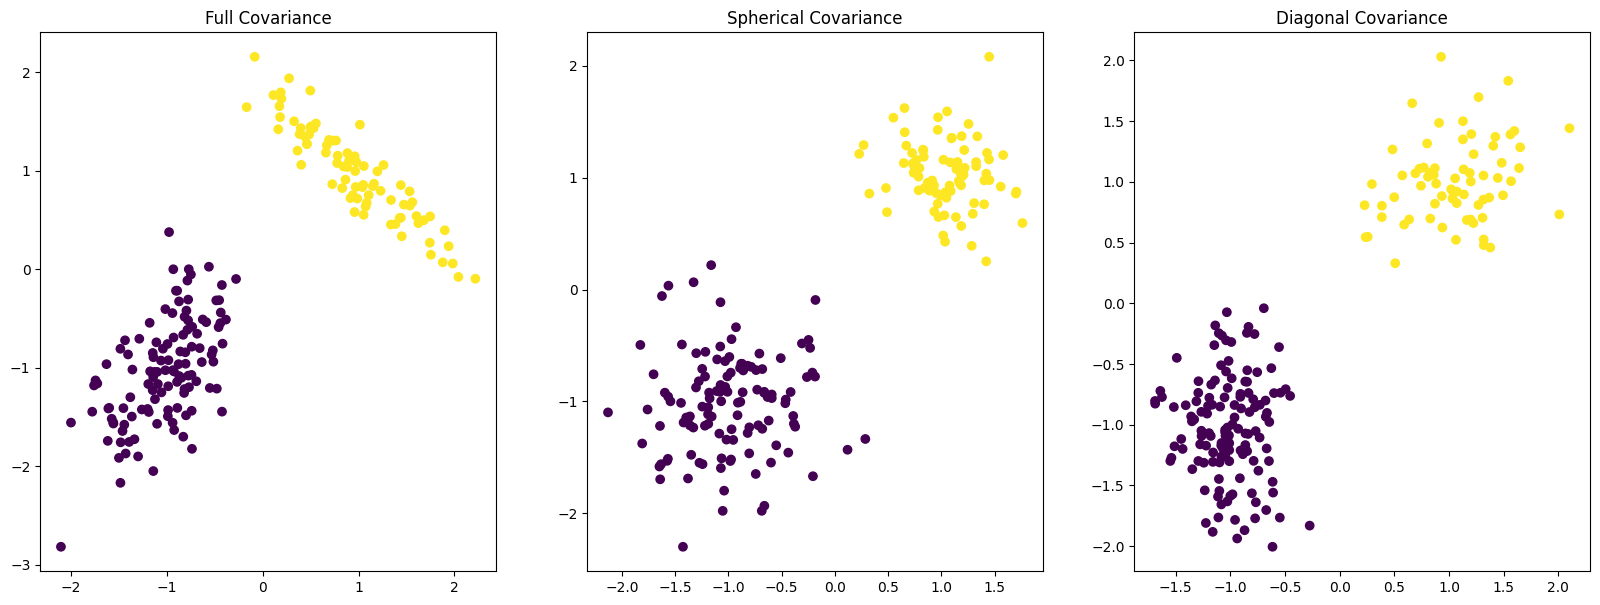

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions
    data = []
    labels = []
    for _ in range(N):
        # Select Gaussian according to weights
        gaussian_index = np.random.choice(len(pi), p=pi)
        # Sample data point from selected Gaussian
        point = np.random.multivariate_normal(mu[gaussian_index], sigma[gaussian_index])
        data.append(point)
        labels.append(gaussian_index)

    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1.0, -1.0])    # Mean vector of component1 in GMM
sig1 = np.array([[0.15, 0.1], [0.1, 0.25]])   # Full covariance matrix of component1 in GMM
mu2 = np.array([1.0, 1.0])    # Mean vector of component2 in GMM
sig2 = np.array([[0.3, -0.25], [-0.25, 0.25]])   # Full covariance matrix of component2 in GMM
pi = [0.6, 0.4]     # Prior probabilities

n_points = 200  # Number of points

# Spherical covariances
sig1_s = np.array([[0.2, 0.0], [0.0, 0.2]])
sig2_s = np.array([[0.1, 0.0], [0.0, 0.1]])
# Diagonal covariances
sig1_d = np.array([[0.1, 0.0], [0.0, 0.2]])
sig2_d = np.array([[0.2, 0.0], [0.0, 0.1]])

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='viridis')
ax[0].set_title('Full Covariance')


#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].set_title('Spherical Covariance')
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='viridis')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].set_title('Diagonal Covariance')
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='viridis')

plt.show()


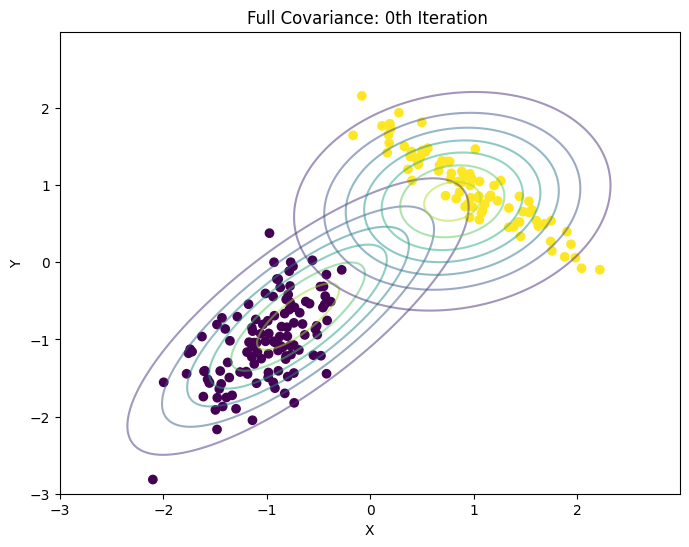

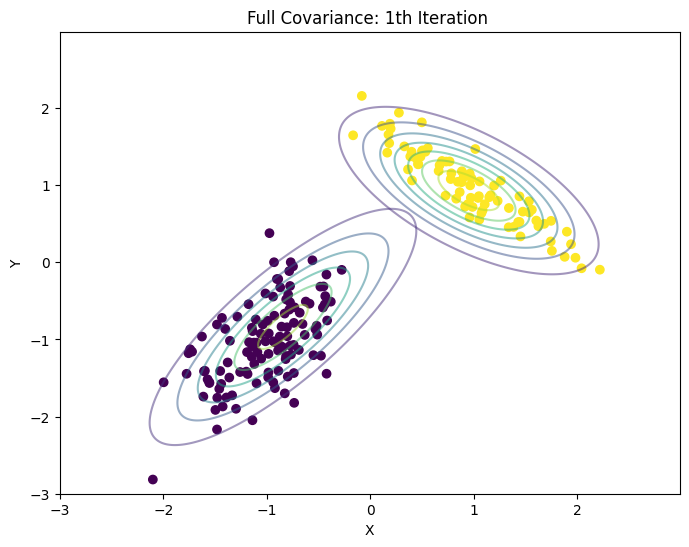

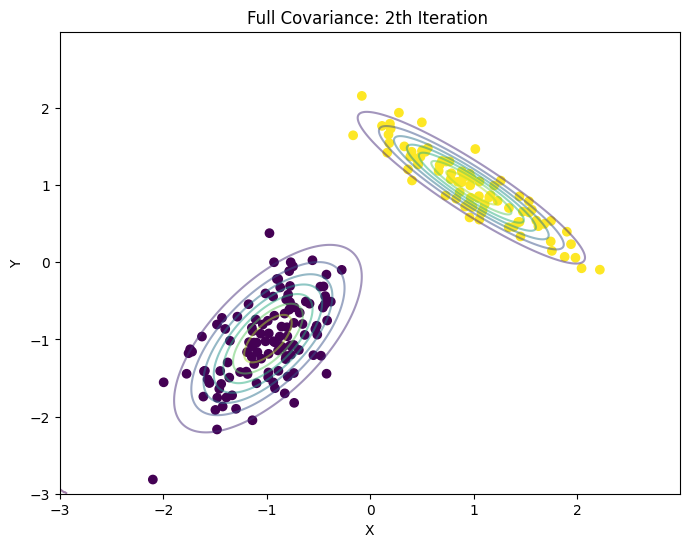

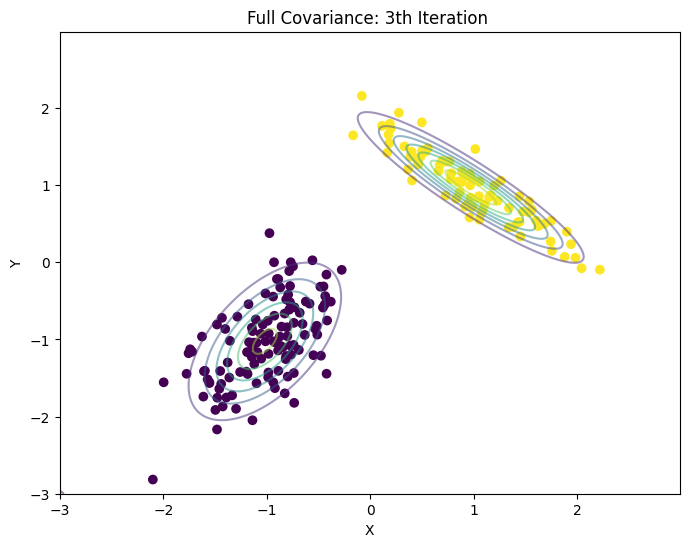

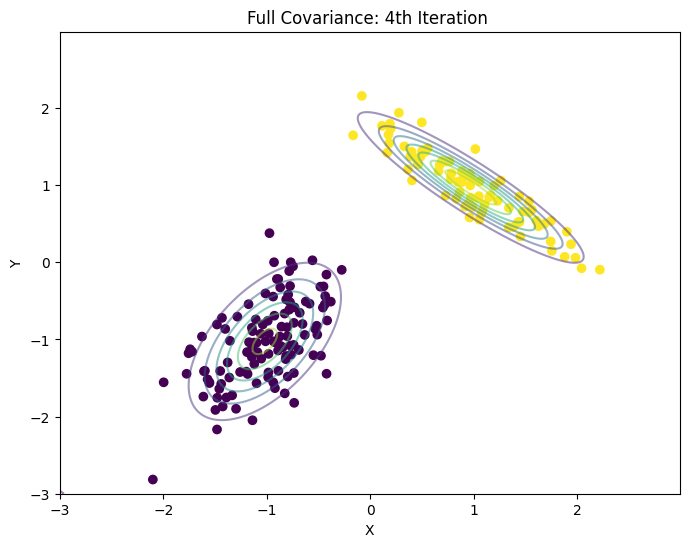

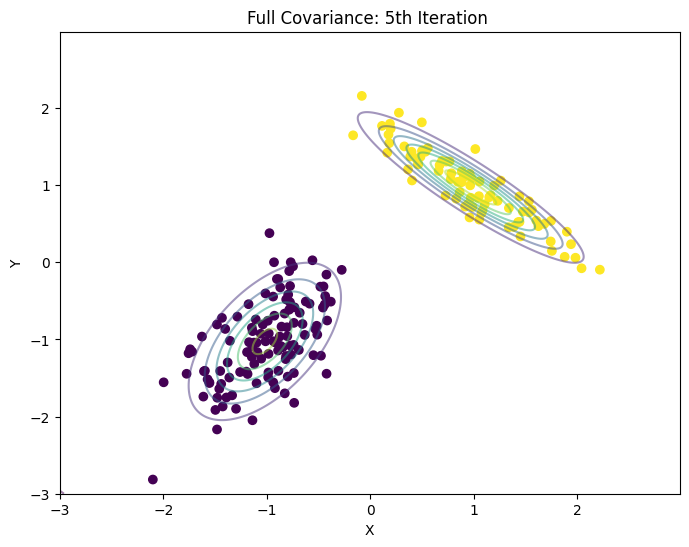

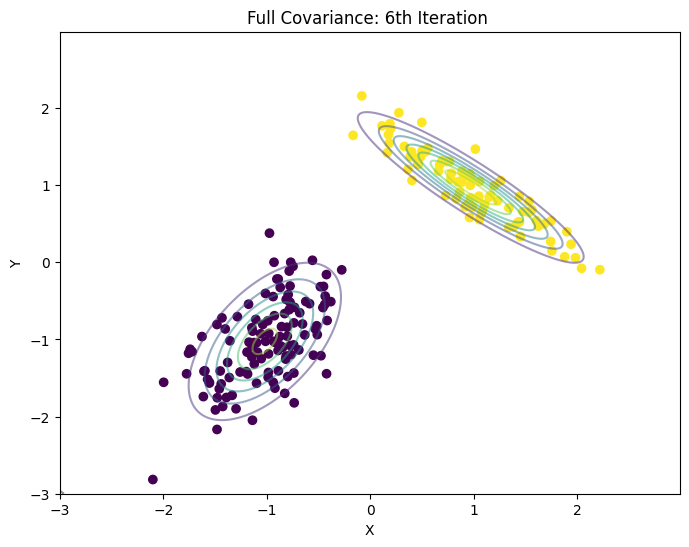

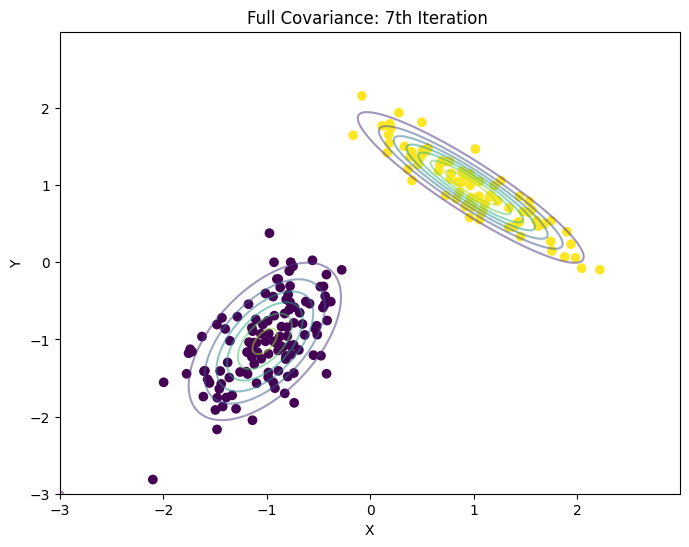

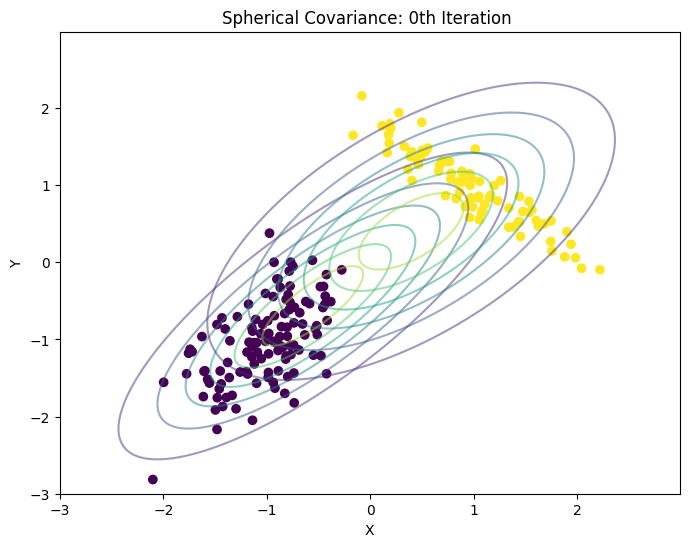

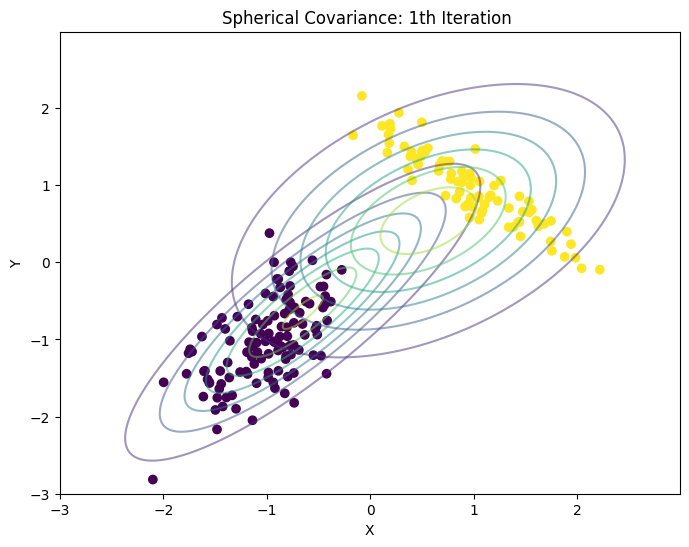

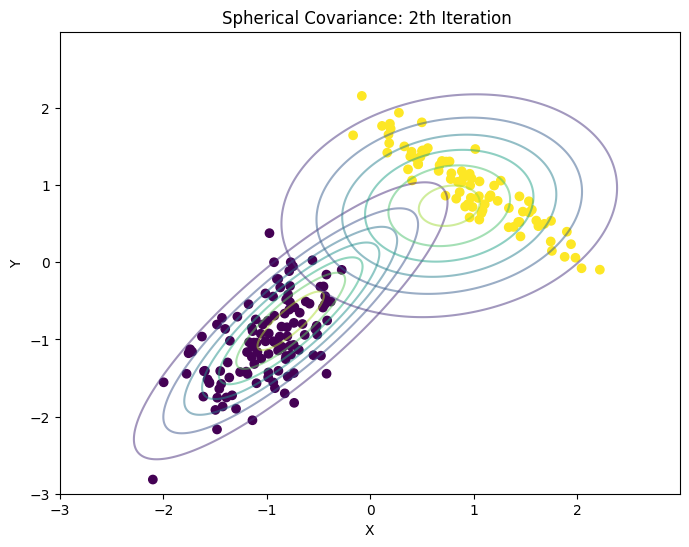

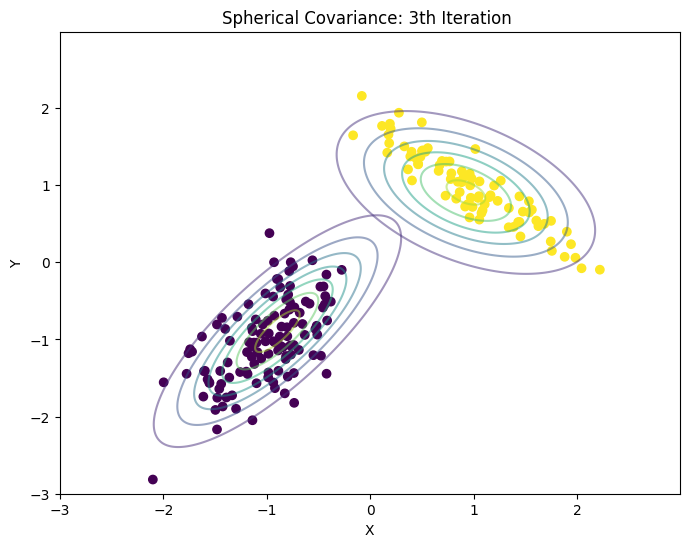

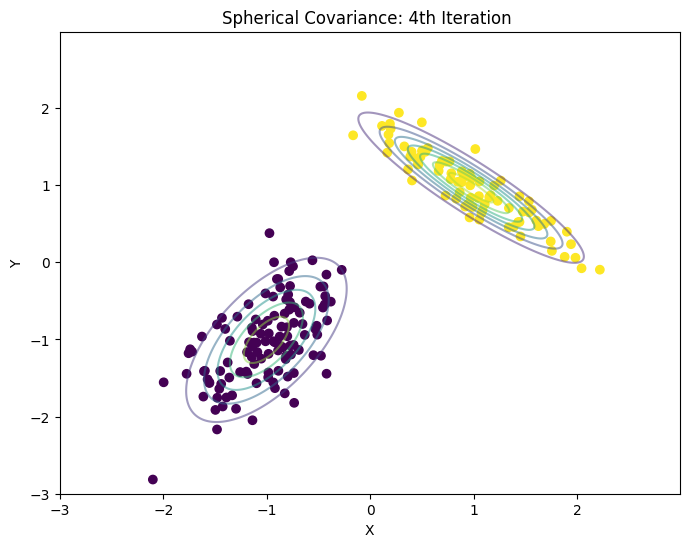

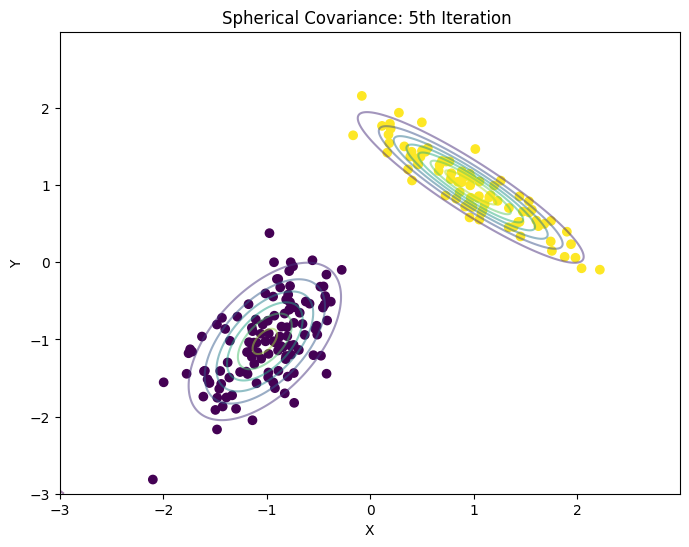

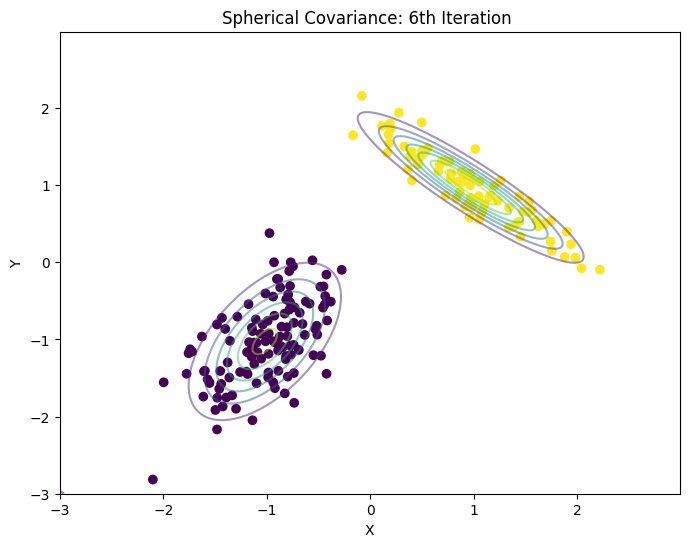

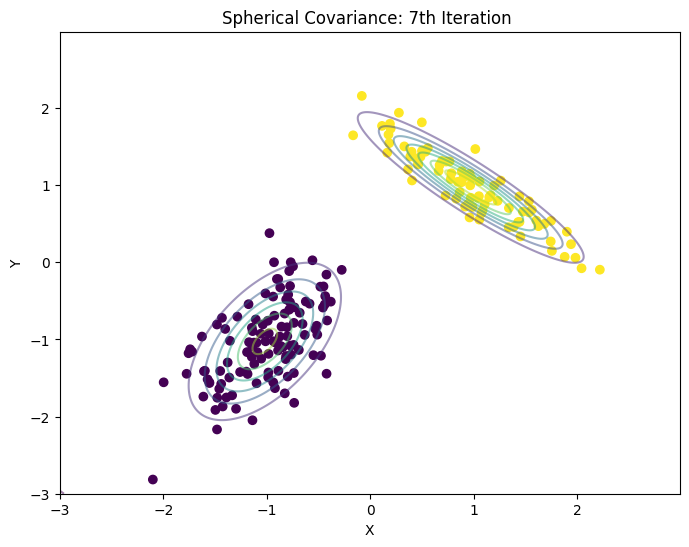

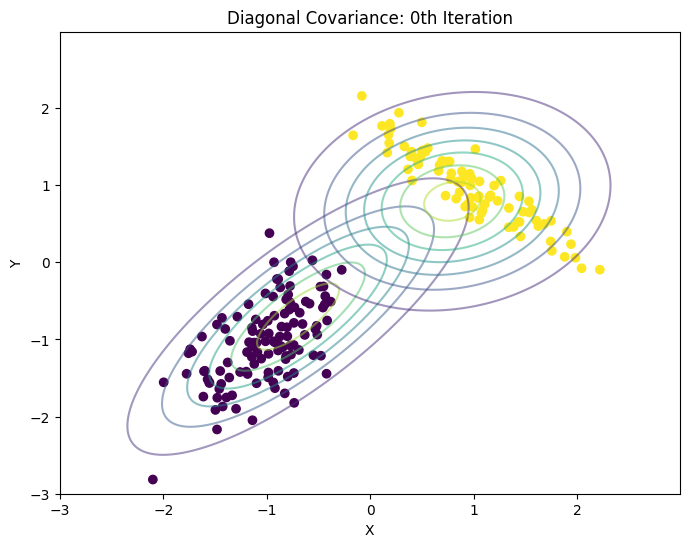

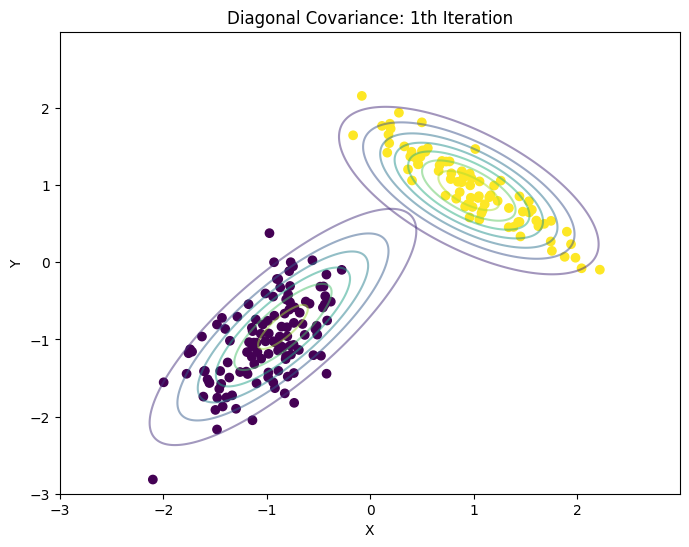

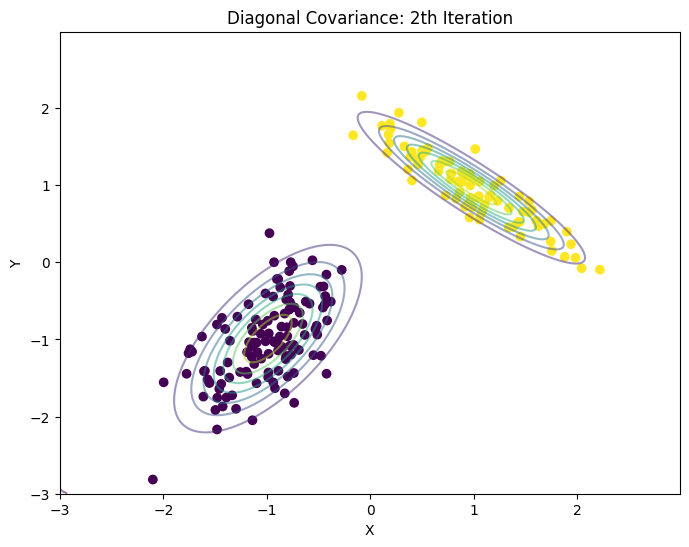

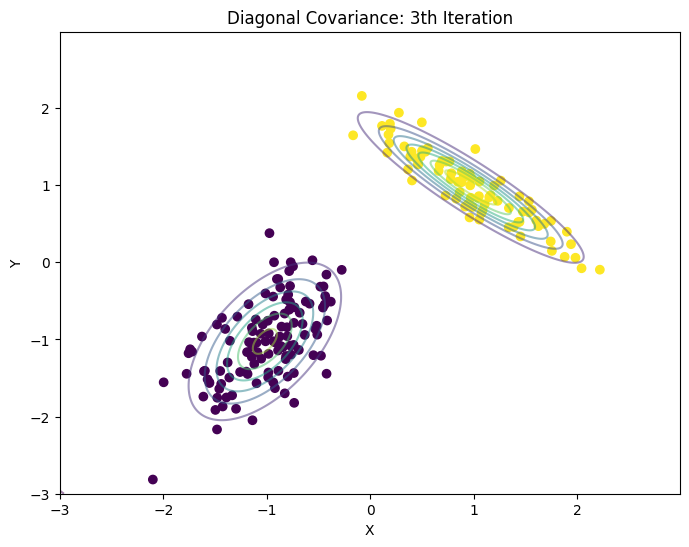

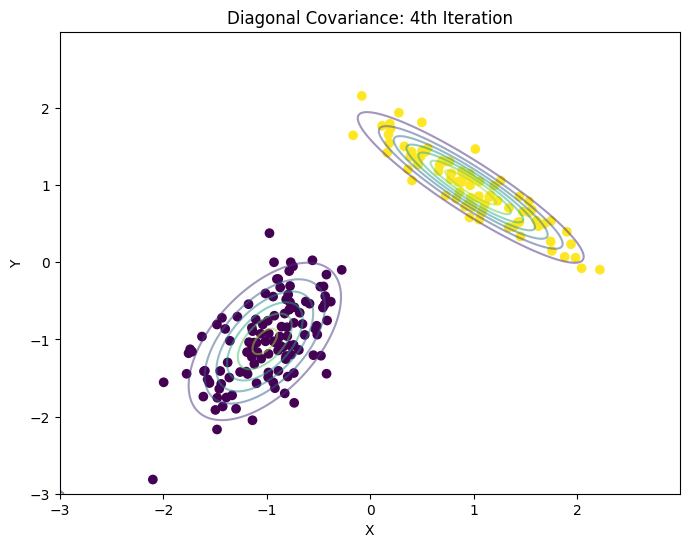

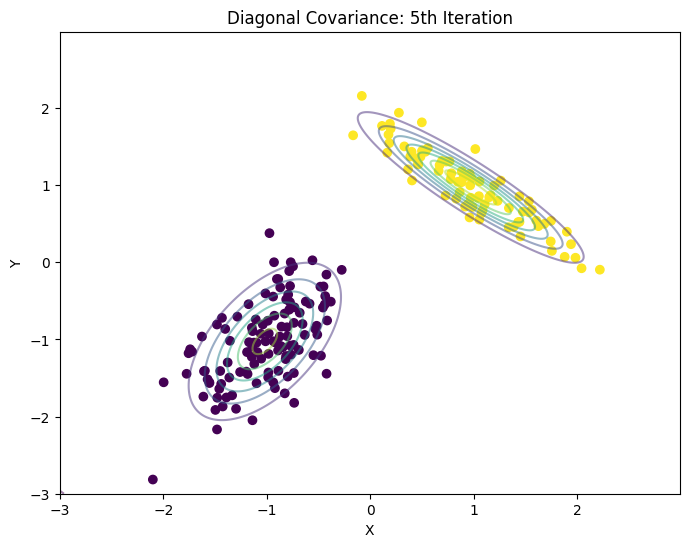

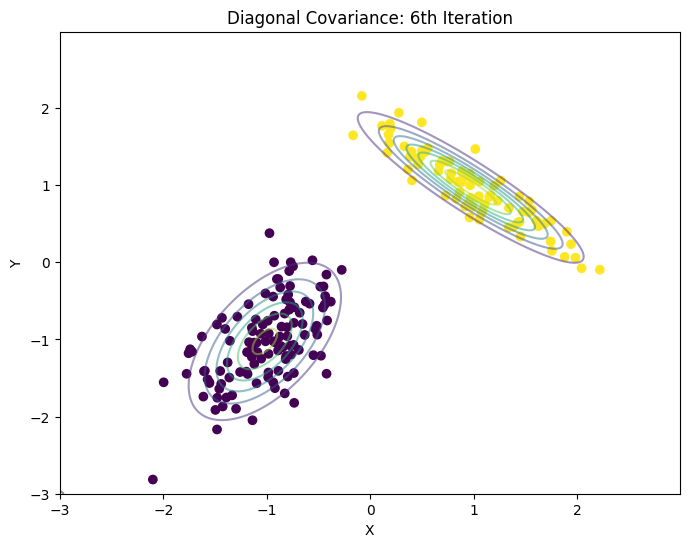

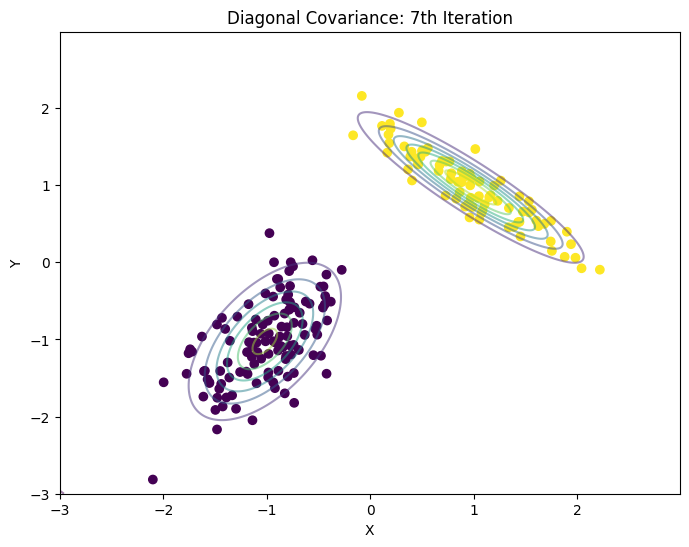

In [ ]:
# All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
# Part-6)-b: Implementation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
# Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    # Inputs: data, parameters of GMM model
    # Outputs: likelihood
    total_likelihood = 0
    likelihoods = []
    for point in data:
        point_prob = 0
        for k in range(len(pi)):
            point_prob += pi[k] * multivariate_normal.pdf(point, mu[k], sigma[k])
        likelihoods.append(point_prob)
        total_likelihood += np.log(point_prob)
    if log_likelihood:
        return total_likelihood
    elif likelihoods:
        return likelihoods
    return np.exp(total_likelihood)

############################################################################
# Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
    # Inputs: data, parameters of GMM model
    # Outputs: gamma
    N = len(data)
    M = len(pi)
    gamma = np.zeros((N, M))
    for n in range(N):
        for k in range(M):
            numerator = pi[k] * multivariate_normal.pdf(data[n], mu[k], sigma[k])
            denominator = sum(pi[j] * multivariate_normal.pdf(data[n], mu[j], sigma[j]) for j in range(M))
            gamma[n, k] = numerator / denominator
    return gamma

############################################################################
# Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
    # Inputs: data, gamma
    # Outputs: Updated parameters of GMM model

    #Update mu
    #Update pi
    pi1 = np.sum(gamma, axis=0) / len(data)
    mu1 = np.dot(gamma.T, data) / np.sum(gamma, axis=0)[:, np.newaxis]

    #Update sigma
    sigma1 = []
    for k in range(len(pi)):
        diff = data - mu1[k]
        sigma_k = np.dot(gamma[:, k] * diff.T, diff)/np.sum(gamma, axis=0)[k]
        sigma1.append(sigma_k)

    return pi1, mu1, sigma1

############################################################################
# Complete the below function. It plots the contours
############################################################################
def plot_contours(data, labels, pi, mu, sigma, title):
    plt.figure(figsize=(8, 6))
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    for k in range(len(pi)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(x, y, rv.pdf(pos), alpha=0.5)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

############################################################################
# Run the expectation and maximization algorithm to estimate the parameters
############################################################################
# Data to run EM-algorithm
data = data_full
# Labels
labels = labels_full
# Number of input examples
N = len(data)
# Data dimension
D = data.shape[1]
# Number of components in GMM
M = 2

# Initialize the prior probabilities
pi = np.array([0.5, 0.5])
# Initialize the mean vectors
mu = np.array([[0.0, 0.0], [1.0, 1.0]])
# Initialize the covariance matrices

sigma_full = [np.identity(D) for _ in range(M)]
sigma_spherical = [np.eye(D) * np.trace(sigma_full[0]), np.eye(D) * np.trace(sigma_full[1])]
sigma_diagonal = [np.diag(np.diag(sigma_full[0])), np.diag(np.diag(sigma_full[1]))]

# Number of steps to run EM algorithm
nsteps = 8
for index in range(0, nsteps, 1):

    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma_full, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma_full)

    # Maximization step
    pi, mu, sigma_full = maximization(data, gamma)

    # Plot the contours for full covariance
    plot_contours(data, labels, pi, mu, sigma_full, 'Full Covariance: {}th Iteration '.format(index+1))

# Re-initialize for spherical covariance
pi = np.array([0.5, 0.5])
mu = np.array([[0.0, 0.0], [1.0, 1.0]])
nsteps = 8
for index in range(0, nsteps, 1):

    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma_spherical, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma_spherical)

    # Maximization step
    pi, mu, sigma_spherical = maximization(data, gamma)

    # Plot the contours for spherical covariance
    plot_contours(data, labels, pi, mu, sigma_spherical, 'Spherical Covariance: {}th Iteration '.format(index+1))

# Re-initialize for diagonal covariance
pi = np.array([0.5, 0.5])
mu = np.array([[0.0, 0.0], [1.0, 1.0]])
nsteps = 8
for index in range(0, nsteps, 1):

    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma_diagonal, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma_diagonal)

    # Maximization step
    pi, mu, sigma_diagonal = maximization(data, gamma)

    # Plot the contours for diagonal covariance
    plot_contours(data, labels, pi, mu, sigma_diagonal, 'Diagonal Covariance: {}th Iteration'.format(index+1))

In [ ]:
############################################################################
## Part-6)-d: Understand the issues with EM algorithm
############################################################################

def run_multiple_EM(data, pi, mu, sigma, n_runs=5, n_steps=10):
    likelihood_history = []

    for run in range(n_runs):
        print(f"Run {run + 1}")

        pi_run, mu_run, sigma_run = pi, mu, sigma
        likelihoods = []

        for index in range(n_steps):
            ll = likelihood(data, pi_run, mu_run, sigma_run)
            likelihoods.append(ll)

            gamma = expectation(data, pi_run, mu_run, sigma_run)
            pi_run, mu_run, sigma_run = maximization(data, gamma)

        likelihood_history.append(likelihoods)

    return likelihood_history


data = data_full

M = 2


pi = np.array([0.5, 0.5])

mu = np.array([[0.0, 0.0], [1.0, 1.0]])


sigma_full = [np.identity(data.shape[1]) for _ in range(M)]
sigma_spherical = [np.eye(data.shape[1]) * np.trace(sigma_full[0]), np.eye(data.shape[1]) * np.trace(sigma_full[1])]
sigma_diagonal = [np.diag(np.diag(sigma_full[0])), np.diag(np.diag(sigma_full[1]))]


likelihood_history_full = run_multiple_EM(data, pi, mu, sigma_full)
likelihood_history_spherical = run_multiple_EM(data, pi, mu, sigma_spherical)
likelihood_history_diagonal = run_multiple_EM(data, pi, mu, sigma_diagonal)


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
for i, ll in enumerate(likelihood_history_full):
    plt.plot(range(1, len(ll) + 1), ll, label=f"Run {i + 1}")
plt.title('Full Covariance Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()

plt.subplot(1, 3, 2)
for i, ll in enumerate(likelihood_history_spherical):
    plt.plot(range(1, len(ll) + 1), ll, label=f"Run {i + 1}")
plt.title('Spherical Covariance Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()

plt.subplot(1, 3, 3)
for i, ll in enumerate(likelihood_history_diagonal):
    plt.plot(range(1, len(ll) + 1), ll, label=f"Run {i + 1}")
plt.title('Diagonal Covariance Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()

plt.tight_layout()
plt.show()


Run 1
Run 2
Run 3
Run 4
Run 5
Run 1
Run 2
Run 3
Run 4
Run 5
Run 1


### Initialization's Impact

1. *Convergence Speed*: The speed at which the EM algorithm converges to a solution can be greatly influenced by initialization. While inadequate initialization may cause the method to reach a local maximum that is not the global maximum or slow down convergence, good initialization (near to the genuine parameters) might accelerate convergence.

2. *Quality of Fit*: The initial parameters have a significant influence on the final parameters that are produced after the EM rounds. The EM algorithm is more likely to converge to a model that better fits the data when it starts with parameters that are closer to reality. A poor fit could arise from incorrect initialization because the algorithm could become trapped in local optima.

3. *EM iterations illustration*: You would probably notice that the Gaussian component contours fast match the data point distribution in circumstances when the initialization was better. Poor initialization, on the other hand, may result in more significant changes in the first few iterations as the algorithm tries to rectify itself.

### Impact of Type of Covariance Matrix

1. *Full Covariance*: Captures every aspect of variance and covariance between the characteristics, offering the greatest versatility. But in exchange for this flexibility, more data are required in order to accurately estimate every parameter without overfitting. Full covariance matrices may offer the best fit in situations involving intricately connected data distributions.

2. *Diagonal Covariance*: Allows variance to fluctuate among features and assumes that they are uncorrelated. Compared to full covariance, this simplification may result in faster convergence and reduced overfitting risk, particularly if the assumption of uncorrelated features is quite correct. But when such correlations exist, it can miss significant links between characteristics, which would result in a worse match.

3. *Spherical Covariance*: This assumption that all features are uncorrelated and have the same variance further simplifies the model. This can function well for very basic data distributions and can be quite efficient in terms of computational resources. It is the least flexible model though, and if the actual data distribution deviates from these presumptions, the fit may be poor.

4. *EM iteration illustration*: The Gaussian components' outlines would be circles with spherical covariance, changing in size but not orientation. The contours for diagonal covariance would be ellipses oriented perpendicular to the axes. The most versatile ellipse shapes—which can more precisely rotate and adapt to the data distribution—are made possible by full covariance. Plots illustrating how these assumptions affect the model's capacity to represent the actual distribution of data over iterations would be displayed.

### Convergence and Log Likelihood
- **Convergence**: The EM algorithm iteratively improves the estimates of the GMM parameters, converging towards a local maximum of the log-likelihood function. This behavior is evident in the increasing log-likelihood values over iterations, indicating that the model is better fitting the data with each step.
- **Log Likelihood**: The log-likelihood metric provides a quantitative measure of how well the model fits the data. A higher log-likelihood value suggests a better fit. However, it's important to monitor for overfitting, especially with complex models having many parameters.

<b> Report your observations </b>

1.

2.

3.

